# ML Challenge 

<img src="https://imageio.forbes.com/specials-images/imageserve/5ecd179f798e4c00060d2c7c/0x0.jpg?format=jpg&height=600&width=1200&fit=bounds" width="500" height="300">

In the bustling city of Financia, the Central Lending Institution (CLI) is the largest provider of loans to individuals and businesses. With a mission to support economic growth and financial stability, CLI processes thousands of loan applications every month. However, the traditional manual review process is time-consuming and prone to human error, leading to delays and inconsistencies in loan approvals.
To address these challenges, CLI has decided to leverage the power of machine learning to streamline their loan approval process. They have compiled a comprehensive dataset containing historical loan application records, including various factors such as credit scores, income levels, employment status, loan terms(measured in years), loan amounts, asset values, and the final loan status (approved or denied).


**Your task is to develop a predictive model that can accurately determine the likelihood of loan approval based on the provided features. By doing so, you will help CLI make faster, more accurate, and fairer lending decisions, ultimately contributing to the financial well-being of the community.**

It is recommended that you follow the typical machine learning workflow, though you are not required to strictly follow each steps: 
1. Data Collection: Gather the data you need for your model. (Already done for you)

2. Data Preprocessing: Clean and prepare the data for analysis. (Already done for you)

3. Exploratory Data Analysis (EDA): Understand the data and its patterns. (Partially done for you)

4. Feature Engineering: Create new features or modify existing ones to improve model performance. (Partially done for you)

5. Model Selection: Choose the appropriate machine learning algorithm.

6. Model Training: Train the model using the training dataset.

7. Model Evaluation: Evaluate the model's performance using a validation dataset.

8. Model Optimization: Optimize the model's parameters to improve performance.

9. Model Testing: Test the final model on a separate test dataset.

**Please include ALL your work and thought process in this notebook**

In [71]:
# You may include any package you deem fit. We sugggest looking into Scikit-learn
import pandas as pd

## Dataset


In [72]:
# DO NOT MODIFY
loan_data = pd.read_csv("../../data/loan_approval.csv")
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## EDA
Uncomment to see desired output. Add more analysis if you like

In [73]:

import matplotlib.pyplot as plt

# ------ Display basic information ------
# print(loan_data.columns)
# print(loan_data.describe())

# ------ Check for missing values ------
#print(loan_data.isnull().sum())

# ------ Visualize the distribution of loan status ------
# loan_status_counts = loan_data['loan_status'].value_counts()
# plt.bar(loan_status_counts.index, loan_status_counts.values)
# plt.title('Distribution of Loan Status')
# plt.xlabel('Loan Status')
# plt.ylabel('Count')

# ------ Visualize the distribution of numerical features ------ 
#loan_data.hist(bins=30, figsize=(20, 15))

# ------ Correlation matrix ------
# corr_matrix = loan_data.corr()
# fig, ax = plt.subplots(figsize=(10, 8))
# cax = ax.matshow(corr_matrix, cmap='coolwarm')
# fig.colorbar(cax)
# plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
# plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# ----- MORE (Encouraged but not required) ------
# TODO 

## Feature Engineering

You may want to convert categorical variables to numerical. For example, education takes on the value Graduate and Not Graduate. But we want it to be 0 or 1 for machine learning algorithms to use.

In [74]:
loan_data['education'] = loan_data['education'].str.strip()
loan_data['education'] = loan_data['education'].map({'Graduate': 1, 'Not Graduate': 0})

# Hint: Other categorical variables are self_employed and loan_status
loan_data.head()

loan_data['self_employed'] = loan_data['self_employed'].str.strip()
loan_data['self_employed'] = loan_data['self_employed'].map({'Yes': 1, 'No': 0})

loan_data['loan_status'] = loan_data['loan_status'].str.strip()
loan_data['loan_status'] = loan_data['loan_status'].map({'Approved': 1, 'Rejected': 0})


# loan_data['self_employed'] = loan_data['self_employed'].map({'Yes': 1, 'No': 0})


# TODO

## Model Selection

You are free to use any classification machine learning models you like: Logistic Regression, Decision Trees/Random Forests, Support Vector Machines, KNN ... 

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()
loan_data.head()
X = loan_data[['no_of_dependents','education','self_employed', 'income_annum', "loan_amount", "loan_term", "cibil_score", "residential_assets_value", "commercial_assets_value", "luxury_assets_value", "bank_asset_value"]].dropna()
y = loan_data.loc[X.index]['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)



## Model Training and Evaluation

Text(0.5, 1.0, 'Model Behavior On Training Set')

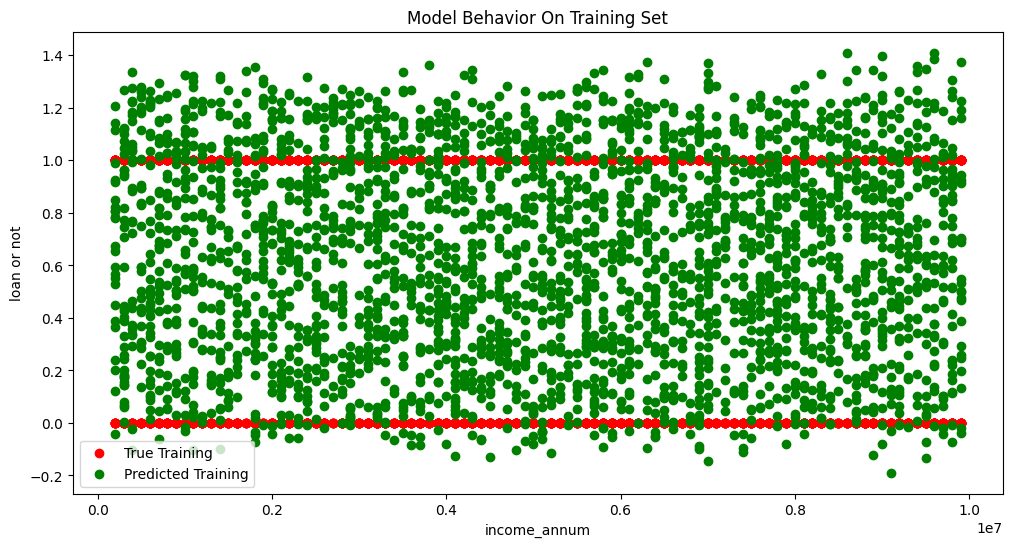

In [86]:
model.fit(X_train, y_train)

y_predict = model.predict(X_train)

col_name = 'income_annum'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], y_predict, color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('loan or not')
plt.title("Model Behavior On Training Set")

## Model Optimization and Testing

In [90]:
import numpy as np


np.mean(model.predict(X_test)-y_test)

model.score(X_test, y_test)
np.mean(np.abs(model.predict(X_test)-y_test))

np.float64(0.24184122675954184)